# Práctica — EBAC LMS

### 3-4 minutos

¡Bienvenidos a la actividad práctica del módulo!

## Antes de empezar

El objetivo de esta actividad es que efectúes un análisis de clasificación mediante Máquinas de soporte vectorial que permita desarrollar un modelo predictivo basado en distintas métricas aplicadas a una base de datos grande.

**Entregable:** Un Jupyter Notebook (archivo de extensión .ipynb), archivo PDF y capturas de pantalla en el espacio de respuesta que muestren tanto el código desarrollado como la solución al problema planteado, incluyendo los comentarios que sean pertinentes a las preguntas que se plantean. Entregas sin estos elementos no serán calificadas.

¡Buena suerte!

## Paso a paso:

Considere la base de datos "recursos_humanos.csv" sobre empleados que abandonan una empresa.

El objetivo es analizar por qué los empleados deciden irse con la competencia y éste podría ser un desafío serio para un departamento de recursos humanos, el cual se podría abordar mediante modelos predictivos de Machine Learning. Las variables manejadas son:

*   satisfaction_level: Nivel de satisfacción.
*   last_evaluation: Puntaje obtenido en la última evaluación.
*   average_montly_hours: Promedio de horas trabajadas al mes.
*   time_spend_company: Tiempo del usuario en la compañía.
*   work_accident: Si el empleado ha tenido algún accidente laboral (1 = Sí, 0 = No).
*   promotion_last_5years: Si el empleado ha sido promovido en los últimos 5 años.
*   sales: Departamento donde trabaja.
*   salary: Categoría del salario.
*   left: Variable a predecir y si el empleado dejó o no la empresa (1 = Sí, 0 = No).

1.  Cargue la base de datos en Python y asegúrese de re-codificar las variables categóricas de manera pertinente antes de iniciar su análisis (Sugerencia: Use "pd.get_dummies")
2.  Use el método de Máquinas de soporte vectorial para generar un modelo predictivo. Para dicho fin, pruebe los 4 diferentes tipos de Kernel discutidos en esta lección. En cada caso elabore un mapa de calor para las matrices de confusión así como un reporte de clasificación detallado. Interprete verbalmente sus indicadores.
3.  ¿Cuál resultó ser el modelo predictivo más adecuado? Explique su razonamiento.
4.  ¿Qué resultado pronosticaría para un empleado con los siguientes indicadores?

#### 1.  Cargue la base de datos en Python y asegúrese de re-codificar las variables categóricas de manera pertinente antes de iniciar su análisis (Sugerencia: Use "pd.get_dummies")

In [43]:
import numpy as numpy 
import matplotlib.pyplot as plt
import pandas as pd 

df = pd.read_csv(('recursos_humanos.csv'))
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [45]:
df_dummies = pd.get_dummies(df, columns=['sales', 'salary'], drop_first=True)

df_dummies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales_RandD            14999 non-null  bool   
 9   sales_accounting       14999 non-null  bool   
 10  sales_hr               14999 non-null  bool   
 11  sales_management       14999 non-null  bool   
 12  sales_marketing        14999 non-null  bool   
 13  sales_product_mng      14999 non-null  bool   
 14  sales_sales            14999 non-null  bool   
 15  sa

In [46]:
df_dummies = df_dummies.drop('number_project', axis=1)

df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   sales_RandD            14999 non-null  bool   
 8   sales_accounting       14999 non-null  bool   
 9   sales_hr               14999 non-null  bool   
 10  sales_management       14999 non-null  bool   
 11  sales_marketing        14999 non-null  bool   
 12  sales_product_mng      14999 non-null  bool   
 13  sales_sales            14999 non-null  bool   
 14  sales_support          14999 non-null  bool   
 15  sa

#### 2.  Use el método de Máquinas de soporte vectorial para generar un modelo predictivo. Para dicho fin, pruebe los 4 diferentes tipos de Kernel discutidos en esta lección. En cada caso elabore un mapa de calor para las matrices de confusión así como un reporte de clasificación detallado. Interprete verbalmente sus indicadores.

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [48]:
X = df_dummies.drop('left', axis=1) 
y = df_dummies['left']  

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

In [52]:
confusion_matrices = []
class_reports = []

In [53]:
for kernel in kernels:
    model = SVC(kernel=kernel, random_state=42)

    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred)

    confusion_matrices.append(cm)

    cr = classification_report(y_test, y_pred)

    class_reports.append(cr)

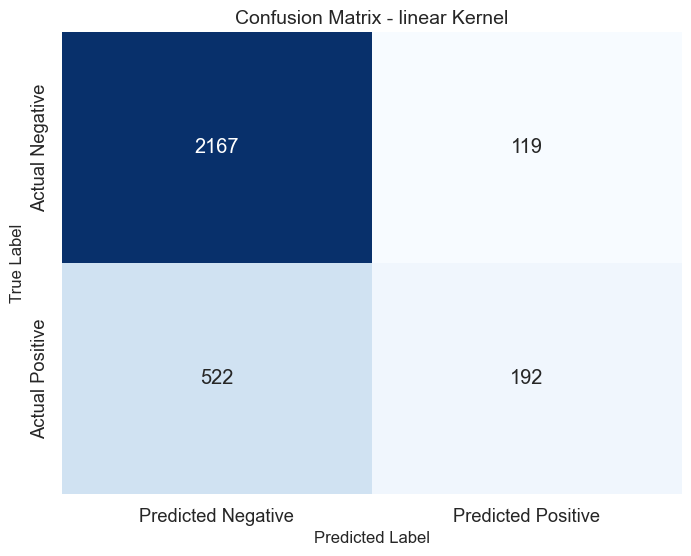


Classification Report - linear Kernel:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      2286
           1       0.62      0.27      0.37       714

    accuracy                           0.79      3000
   macro avg       0.71      0.61      0.62      3000
weighted avg       0.76      0.79      0.75      3000



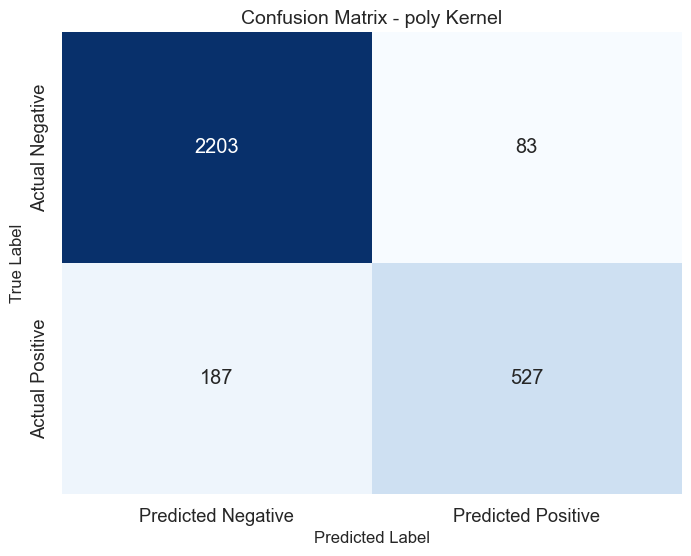


Classification Report - poly Kernel:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2286
           1       0.86      0.74      0.80       714

    accuracy                           0.91      3000
   macro avg       0.89      0.85      0.87      3000
weighted avg       0.91      0.91      0.91      3000



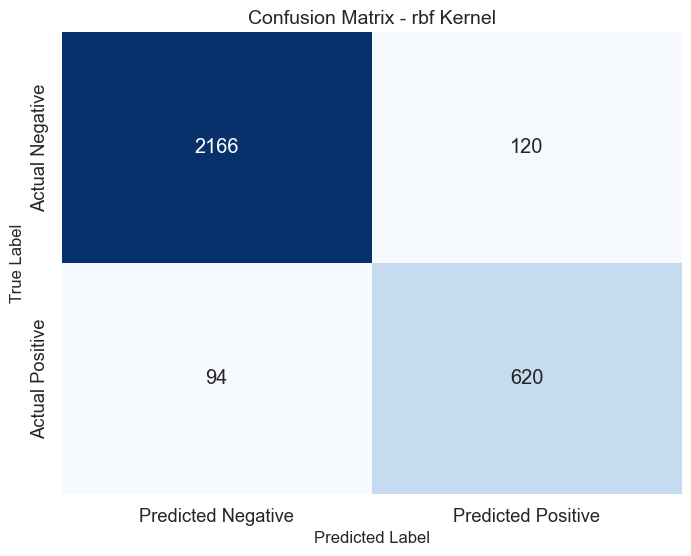


Classification Report - rbf Kernel:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2286
           1       0.84      0.87      0.85       714

    accuracy                           0.93      3000
   macro avg       0.90      0.91      0.90      3000
weighted avg       0.93      0.93      0.93      3000



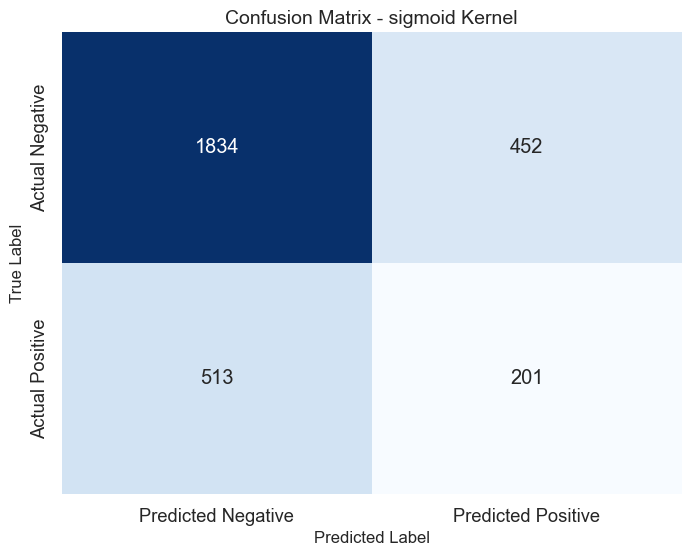


Classification Report - sigmoid Kernel:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      2286
           1       0.31      0.28      0.29       714

    accuracy                           0.68      3000
   macro avg       0.54      0.54      0.54      3000
weighted avg       0.67      0.68      0.67      3000



In [58]:
for i, cm in enumerate(confusion_matrices):
    cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

    # Gráfico de Seaborn
    plt.figure(figsize=(8, 6)) 
    sns.set(font_scale=1.2)  # Ajusta el tamaño de la fuente para mejor legibilidad
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)  # fmt="d" para mostrar números enteros
    plt.title(f'Confusion Matrix - {kernels[i]} Kernel', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.show()

    # Imprime el informe de clasificación (manténlo como antes)
    print(f'\nClassification Report - {kernels[i]} Kernel:\n{class_reports[i]}')


#### 3.  ¿Cuál resultó ser el modelo predictivo más adecuado? Explique su razonamiento.

¡Excelente! Ahora que tenemos los informes de clasificación, podemos analizar cuál modelo es el más adecuado.

**Análisis:**

| Kernel     | Accuracy | Macro Avg F1-Score | Weighted Avg F1-Score | Precision (Clase 0) | Recall (Clase 0) | Precision (Clase 1) | Recall (Clase 1) |
|------------|----------|--------------------|-----------------------|---------------------|-------------------|---------------------|------------------|
| Linear     | 0.79     | 0.62                | 0.75                   | 0.81                | 0.95              | 0.62                | 0.27             |
| Poly       | 0.91     | 0.87                | 0.91                   | 0.92                | 0.96              | 0.86                | 0.74             |
| RBF        | 0.93     | 0.90                | 0.93                   | 0.96                | 0.95              | 0.84                | 0.87             |
| Sigmoid    | 0.68     | 0.54                | 0.67                   | 0.78                | 0.80              | 0.31                | 0.28             |

**Conclusiones:**

- **RBF es el mejor modelo:** El modelo con kernel RBF supera a los demás en todas las métricas consideradas:
    - Tiene la exactitud más alta (0.93), lo que indica un buen rendimiento general.
    - Sus puntuaciones F1 (macro y weighted) son las más altas, lo que demuestra un buen equilibrio entre precisión y recall para ambas clases.
    - Tiene la precisión y recall más altos para la clase 1 (0.84 y 0.87, respectivamente), lo cual es crucial ya que la clase 1 parece ser la minoritaria (tiene menos ejemplos).

- **Poly también es un buen modelo:** El modelo con kernel Poly también tiene un rendimiento muy bueno, especialmente en la clase mayoritaria (clase 0).

- **Linear y Sigmoid son menos adecuados:** El modelo con kernel Linear tiene un rendimiento aceptable, pero no es tan bueno como RBF o Poly. El modelo con kernel Sigmoid tiene el peor rendimiento en general, especialmente en la clase minoritaria (clase 1).





4.  ¿Qué resultado pronosticaría para un empleado con los siguientes indicadores?

In [62]:
X_test

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
6910,0.88,1.00,125,3,0,0,False,False,False,False,False,False,False,False,True,False,True
2860,0.99,0.68,190,3,0,0,False,False,False,False,False,False,False,False,True,True,False
6286,0.40,0.67,115,3,0,0,False,True,False,False,False,False,False,False,False,False,True
12838,0.98,0.77,191,2,0,0,False,False,False,False,False,False,True,False,False,False,True
13692,0.83,0.73,157,2,0,0,True,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6736,0.98,0.57,229,3,0,0,False,False,False,False,False,False,True,False,False,True,False
5093,0.92,0.55,172,2,0,0,False,False,False,False,False,False,False,False,True,False,False
6841,0.90,0.48,213,3,0,0,False,False,False,False,False,False,False,True,False,True,False
6413,0.70,0.60,224,3,0,0,False,False,False,False,False,False,False,True,False,False,True


In [64]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.07787921,  1.65763337, -1.52135909, ...,  2.11813862,
        -0.98158465,  1.16267915],
       [ 1.52037103, -0.21207361, -0.21979422, ...,  2.11813862,
         1.01876084, -0.86008251],
       [-0.85299418, -0.27050195, -1.72159984, ..., -0.47211263,
        -0.98158465,  1.16267915],
       ...,
       [ 1.15833227, -1.38064047,  0.2407595 , ..., -0.47211263,
         1.01876084, -0.86008251],
       [ 0.35380169, -0.67950035,  0.46102433, ..., -0.47211263,
        -0.98158465,  1.16267915],
       [ 0.51470781,  1.0149216 , -0.37998682, ..., -0.47211263,
         1.01876084, -0.86008251]])

In [ ]:
best_kernel = 'rbf'

model = SVC(kernel=best_kernel, random_state=42)

model.fit(X_train_scaled, y_train)

X_sample_scaled = scaler.transform(
    [ ]
)

y_pred = model.predict(X_test_scaled)